In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
data_path="A:/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv"

In [4]:
rdata=pd.read_csv(data_path)
rdata.shape

(223549, 8)

In [5]:
print("No. of rows=",rdata.shape[0])
print("No. of columns=",rdata.shape[1])
print("\n")
printmd("**Sample Data:**")
rdata.head()

No. of rows= 223549
No. of columns= 8




**Sample Data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Checking for any Missing values in the dataset

In [6]:
missing_value=rdata.isnull().sum()
missing_value

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
# Comments with no label are considered to be clean comments.
rowSums = rdata.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(rdata))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(rdata)-clean_comments_count))

Total number of comments =  223549
Number of clean comments =  201081
Number of comments with labels = 22468


In [8]:
# dropping the rows with are not required that is id and comment_text
rdata_toxic=rdata.drop(['id','comment_text'],axis=1)

In [9]:
categories=list(rdata.columns.values)
categories

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

In [10]:
#Calculating number of comments in each category
counts = []
categories = list(rdata_toxic.columns.values)
for i in categories:
    counts.append((i, rdata_toxic[i].sum()))
rdata_stats = pd.DataFrame(counts, columns=['category', 'count'])
rdata_stats

,category,count
0,toxic,21384
1,severe_toxic,1962
2,obscene,12140
3,threat,689
4,insult,11304
5,identity_hate,2117


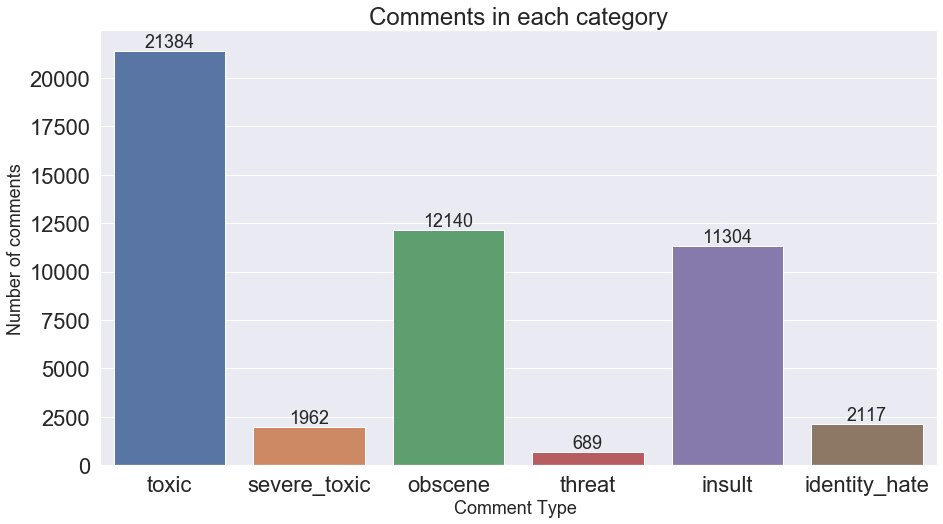

In [11]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, rdata.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = rdata.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

Calculating number of comments having multiple labels

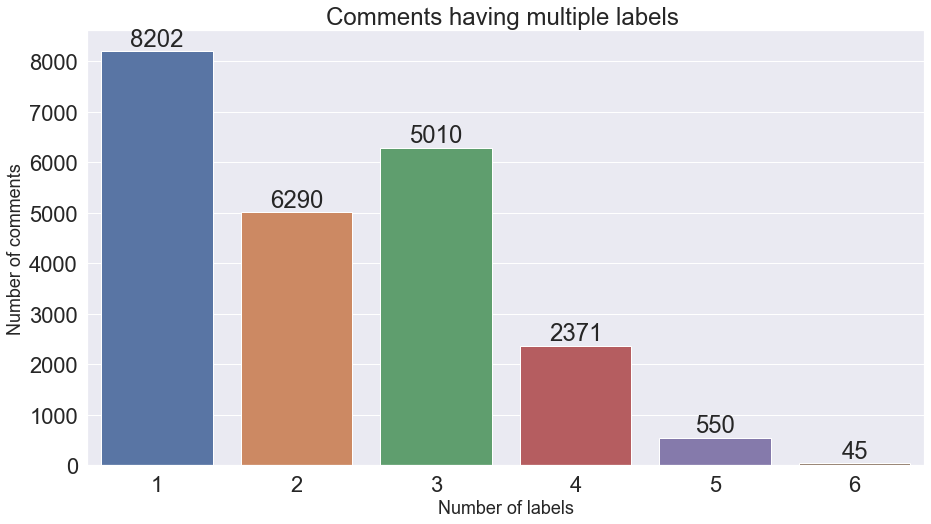

In [12]:
rowSums = rdata.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

2. Data Pre-Processing

In [13]:
data = rdata
data = rdata.loc[np.random.choice(rdata.index, size=2000)]
data.shape

(2000, 8)

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Cleaning Data

In [15]:
def cleanHtml(sentence):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr, ' ',str(sentence))
    return cleantext

def cleanPunc(sentence):
    cleaned=re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned=cleaned.strip()
    cleaned=cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent=""
    for word in sentence.split():
        alpha_word=re.sub('[^a-z A-Z]+',' ',word)
        alpha_sent+=alpha_word
        alpha_sent+=" "
    alpha_sent=alpha_sent.strip()
    return alpha_sent

In [16]:
data['comment_text']=data['comment_text'].str.lower()
data['comment_text']=data['comment_text'].apply(cleanHtml)
data['comment_text']=data['comment_text'].apply(cleanPunc)
data['comment_text']=data['comment_text'].apply(keepAlpha)

In [17]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
194428,8b33ad2383b3b773,hi specifico ive seen some other posts elsewhe...,0,0,0,0,0,0
209070,c5234ef0117a98a7,repressions against protesters and parliamenta...,0,0,0,0,0,0
122885,9167096bb803c09e,yes i would mind you need to stop worrying so ...,0,0,0,0,0,0
66233,b12c3b9e97331923,the white house criticism of fox news i love...,0,0,0,0,0,0
208195,c1b94062bc597c73,i say we split this into da vinci code theory ...,0,0,0,0,0,0


Removing stopwords

In [18]:
stop=set(stopwords.words('english'))
stop.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','again','beside','yet','within','however'])
re_stop=re.compile(r"\b(" + "|".join(stop) + ")\\W",re.I)
def removeStopWords(sentence):
    global re_stop
    return re_stop.sub(" ",sentence)

data['comment_text']=data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
194428,8b33ad2383b3b773,hi specifico ive seen posts elsewhere sugge...,0,0,0,0,0,0
209070,c5234ef0117a98a7,repressions protesters parliamentarian oppos...,0,0,0,0,0,0
122885,9167096bb803c09e,yes would mind need stop worrying much c...,0,0,0,0,0,0
66233,b12c3b9e97331923,white house criticism fox news love fact...,0,0,0,0,0,0
208195,c1b94062bc597c73,say split da vinci code theory da vinci c...,0,0,0,0,0,0


Stemming

In [19]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
194428,8b33ad2383b3b773,hi specifico ive seen post elsewher suggest do...,0,0,0,0,0,0
209070,c5234ef0117a98a7,repress protest parliamentarian opposit select...,0,0,0,0,0,0
122885,9167096bb803c09e,yes would mind need stop worri much comment yo...,0,0,0,0,0,0
66233,b12c3b9e97331923,white hous critic fox news love fact section t...,0,0,0,0,0,0
208195,c1b94062bc597c73,say split da vinci code theori da vinci code n...,0,0,0,0,0,0


Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [21]:
traintext=train['comment_text']
testtext=test['comment_text']

In [22]:
#TF-ID

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(traintext)
vectorizer.fit(testtext)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [24]:
x_train=vectorizer.transform(traintext)
y_train=train.drop(labels=['id','comment_text'],axis=1)

x_test=vectorizer.transform(testtext)
y_test=test.drop(labels=['id','comment_text'],axis=1)

3. Multi-Label Classification

Multiple Binary Classifications - (One Vs Rest Classifier)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [26]:
%%time
LogReg_pipeline=Pipeline([('clf',OneVsRestClassifier(LogisticRegression(solver='sag'),n_jobs=-1)),])
for category in categories:
    printmd('**Processing {} comments....**'.format(category))
    LogReg_pipeline.fit(x_train,train[category])
    prediction=LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category],prediction)))
    print("\n")

**Processing toxic comments....**

Test accuracy is 0.905




**Processing severe_toxic comments....**

Test accuracy is 0.9833333333333333




**Processing obscene comments....**

Test accuracy is 0.95




**Processing threat comments....**

Test accuracy is 0.9933333333333333




**Processing insult comments....**

Test accuracy is 0.945




**Processing identity_hate comments....**

Test accuracy is 0.99


Wall time: 7.71 s


Multiple Binary Classifications

In [27]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
%%time
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classify=BinaryRelevance(GaussianNB())
#train
classify.fit(x_train,y_train)
#predict
predictions=classify.predict(x_test)
#accuracy score
print("Accuracy=",accuracy_score(y_test,predictions))
print("\n")

Accuracy= 0.8616666666666667


Wall time: 15 s


Classifier Chains

In [29]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [31]:
%%time
classifier=ClassifierChain(LogisticRegression())
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
print("Accuracy=",accuracy_score(y_test,predictions))
print("\n")

Accuracy= 0.9016666666666666


Wall time: 11.8 s
